In [40]:
import matplotlib.pyplot as plt
import csv
from io import StringIO
from numpy import linspace

Year = 3.154e7 #seconds
Mearth = 5.972e24

lamb = 1.65e-6
time = [1.5e7*Year, 5e7*Year, 1e8*Year, 3e8*Year]
M_jup = [20*Mearth, 100*Mearth, 318*Mearth, 636*Mearth]
a_plv = linspace(2 * 1.496e11, 80 * 1.496e11, 500)

In [41]:
aopt_20_list = []; CRscat20Swarm = []; CR20Planet = []
with open('aopt_data20.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if (line_count % 2 == 0):
            row[0] = row[0].replace(",", "").replace("[", "").replace("]", "").split()
            row[0] = [float(row[0][i]) for i in range(len(row[0]))]
            
            row[1] = row[1].replace(",", "").replace("[", "").replace("]", "").split()
            row[1] = [float(row[1][i]) for i in range(len(row[1]))]
            
            row[2] = row[2].replace(",", "").replace("[", "").replace("]", "").split()
            row[2] = [float(row[2][i]) for i in range(len(row[2]))]
            
            aopt_20_list.append(row[0])
            CRscat20Swarm.append(row[1])
            CR20Planet.append(row[2])
        line_count += 1
    print(f'Processed {line_count} lines.')

Processed 8 lines.


In [42]:
print(len(aopt_20_list))
print(len(aopt_20_list[0]))

4
500


<Figure size 432x288 with 0 Axes>

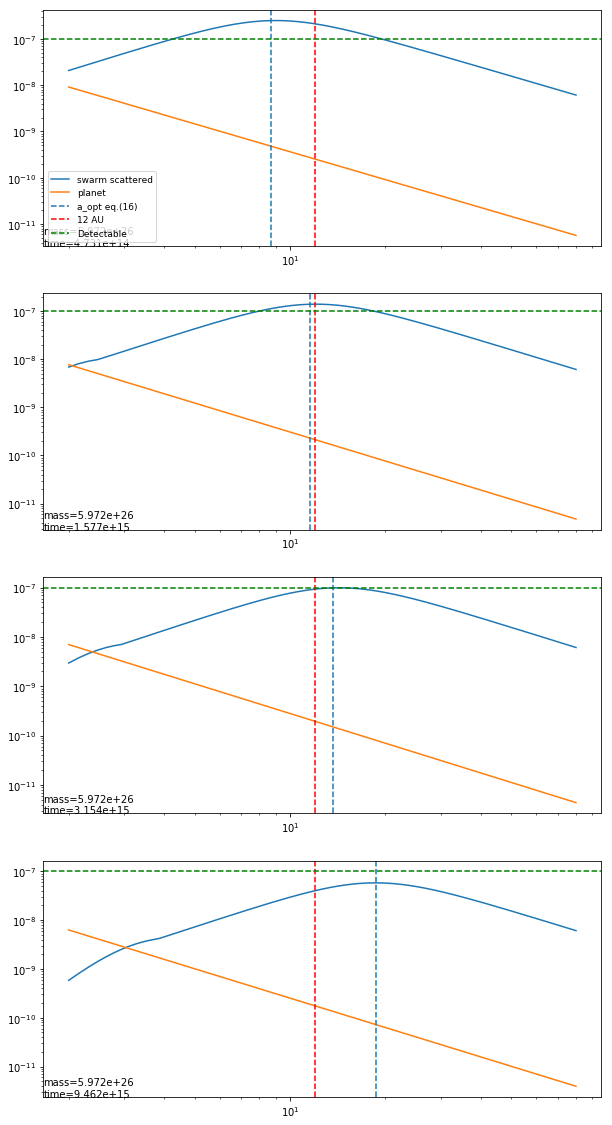

In [47]:
plt.figure(1)
fig, axes = plt.subplots(len(aopt_20_list), subplot_kw=dict(), figsize=(10,20))
for i in range(len(aopt_20_list)):
    axes[i].loglog(a_plv/1.496e11, CRscat20Swarm[i], label="swarm scattered")
    axes[i].loglog(a_plv/1.496e11, CR20Planet[i], label="planet")
    axes[i].axvline(aopt_20_list[i][10], ls='--',label="a_opt eq.(16)")
    axes[i].axvline(12, color='r', ls='--',label="12 AU")
    axes[i].axhline(1e-7, color='g', ls='--',label="Detectable")
    axes[i].text(0, 0, 'mass={0:.3e}'.format(M_jup[1])+'\n'+'time={0:.3e}'.format(time[i]), transform=axes[i].transAxes) 
    if i == 0:
        axes[i].legend(prop={'size': 9})
plt.show()